# Deep Learning with TensorFlow: MNIST Handwritten Digits Classification

This Jupyter notebook builds, trains, and evaluates a Convolutional Neural Network (CNN) model to classify handwritten digits from the MNIST dataset. The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), each 28x28 pixels.

## Goals:
1. Build a CNN model to classify handwritten digits.
2. Achieve greater than 95% test accuracy.
3. Visualize the model’s predictions on 5 sample images.

## Overview of Steps:
- **Step 1:** Import required libraries.
- **Step 2:** Load and preprocess the dataset.
- **Step 3:** Define the CNN model architecture.
- **Step 4:** Compile the model.
- **Step 5:** Train the model.
- **Step 6:** Evaluate model performance on test data.
- **Step 7:** Visualize predictions on 5 sample test images.
- **Step 8 (Optional):** Plot accuracy and loss curves.

Let's start by importing the necessary libraries.

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

## Step 1: Import Required Libraries

- **TensorFlow and Keras:** Used for building and training the neural network model.
- **Matplotlib:** For plotting visualizations like images and training curves.
- **NumPy:** For numerical operations, such as array manipulations.

These libraries provide the tools needed for data handling, model construction, training, and evaluation.

## Step 2: Load and Preprocess the Dataset

The MNIST dataset is loaded directly from TensorFlow's datasets. It consists of:
- **Training set:** 60,000 images and labels.
- **Test set:** 10,000 images and labels.

Preprocessing steps:
- **Normalization:** Pixel values are scaled from [0, 255] to [0, 1] to improve training stability.
- **Reshaping:** Images are reshaped to include a channel dimension (28, 28, 1) since CNNs expect 3D inputs (height, width, channels).

This ensures the data is in the correct format for the CNN.

In [2]:
# Step 2: Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images to include channel dimension (for CNN input)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

## Step 3: Define the CNN Model Architecture

We define a Sequential CNN model with the following layers:
- **Conv2D (32 filters, 3x3 kernel, ReLU activation):** Extracts features from the input images.
- **MaxPooling2D (2x2 pool size):** Reduces spatial dimensions and helps prevent overfitting.
- **Conv2D (64 filters, 3x3 kernel, ReLU activation):** Further feature extraction.
- **MaxPooling2D (2x2 pool size):** Another downsampling layer.
- **Flatten:** Converts 2D feature maps to a 1D vector for the dense layers.
- **Dense (128 units, ReLU activation):** Fully connected layer for learning complex patterns.
- **Dropout (0.3 rate):** Randomly drops 30% of neurons during training to prevent overfitting.
- **Dense (10 units, Softmax activation):** Output layer for 10 classes (digits 0-9).

The input shape is (28, 28, 1) for grayscale images.

In [3]:
# Step 3: Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

c:\Users\Peter Mwaura\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 4: Compile the Model

- **Optimizer:** Adam, an adaptive learning rate optimizer that adjusts based on gradients.
- **Loss Function:** Sparse Categorical Crossentropy, suitable for multi-class classification with integer labels.
- **Metrics:** Accuracy, to track the percentage of correct predictions.

Compiling prepares the model for training by configuring these components.

In [4]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the Model

Training involves feeding the model with training data over multiple epochs:
- **Epochs:** 10 full passes through the training data.
- **Batch Size:** 64 samples per gradient update for efficient memory usage.
- **Validation Split:** 10% of training data used for validation to monitor overfitting.
- **Verbose:** Set to 1 to display progress during training.

The history object stores training metrics for later analysis.

In [5]:
# Step 5: Train the model
print("\nTraining the CNN model...")
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Training the CNN model...
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 125s 143ms/step - accuracy: 0.9379 - loss: 0.2056 - val_accuracy: 0.9877 - val_loss: 0.0457
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 173s 180ms/step - accuracy: 0.9804 - loss: 0.0634 - val_accuracy: 0.9865 - val_loss: 0.0495
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 172s 203ms/step - accuracy: 0.9861 - loss: 0.0457 - val_accuracy: 0.9907 - val_loss: 0.0367
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 146s 172ms/step - accuracy: 0.9887 - loss: 0.0369 - val_accuracy: 0.9893 - val_loss: 0.0372
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 125s 148ms/step - accuracy: 0.9906 - loss: 0.0303 - val_accuracy: 0.9907 - val_loss: 0.0346
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 173s 184ms/step - accuracy: 0.9924 - loss: 0.0246 - val_accuracy: 0.9917 - val_loss: 0.0317
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 171s 202ms/step - accuracy: 0.9932 - loss: 0.0209 - val_accuracy: 0.9907 - val_loss: 0.0363
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 177s 209m

## Step 6: Evaluate Model Performance on Test Data

Evaluation measures the model's performance on unseen test data:
- **Test Loss:** Measures how well the model predicts on test data.
- **Test Accuracy:** Percentage of correct predictions on the test set.

The goal is to achieve >95% test accuracy.

In [6]:
# Step 6: Evaluate model performance on test data
print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


Evaluating model on test data...
313/313 - 8s - 27ms/step - accuracy: 0.9929 - loss: 0.0253

✅ Test Accuracy: 99.29%


## Step 7: Visualize Predictions on 5 Sample Test Images

To understand the model's predictions:
- Predict on the first 5 test images.
- Display each image with the predicted digit and true label.
- Use Matplotlib to create subplots for visualization.

This helps verify the model's qualitative performance.


Visualizing sample predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


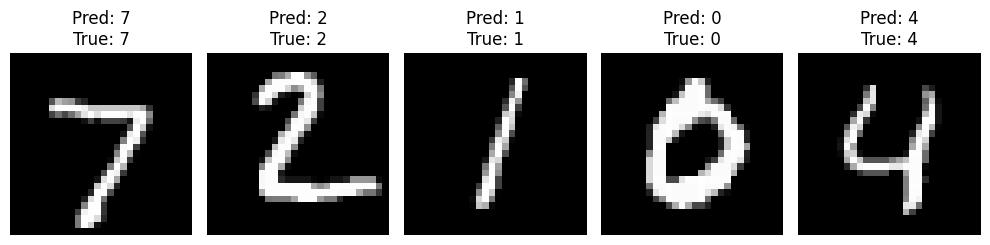

In [7]:
# Step 7: Visualize predictions on 5 sample test images
print("\nVisualizing sample predictions...")
predictions = model.predict(x_test[:5])

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 8 (Optional): Plot Accuracy and Loss Curves

Visualizing training history:
- **Accuracy Plot:** Shows training and validation accuracy over epochs.
- **Loss Plot:** Shows training and validation loss over epochs.

This helps identify overfitting (if validation metrics worsen) or underfitting.

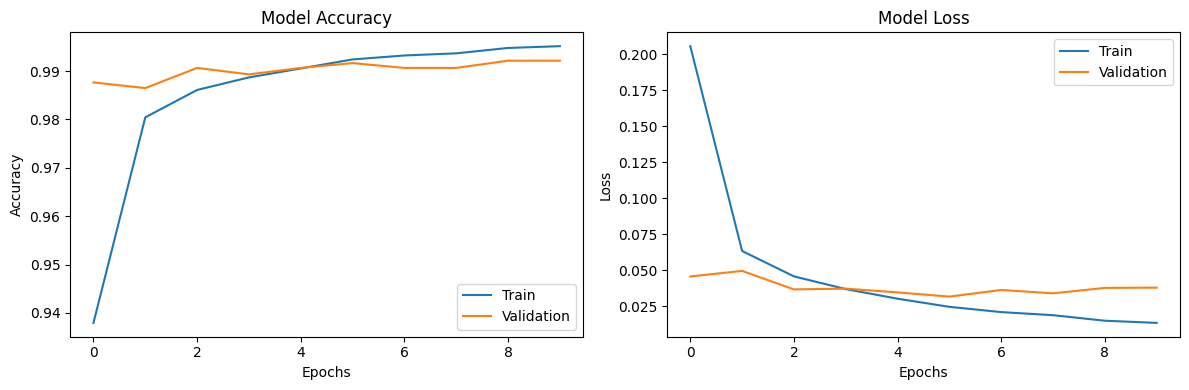

In [8]:
# Step 8 (Optional): Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()